In [28]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn . decomposition import PCA
from sklearn . model_selection import train_test_split
import matplotlib.pyplot as plt

In [29]:
# Load the data
digits = load_digits()
# Extract the three parts of the data .
data = digits.data
images = digits.images
target = digits.target
print(images)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

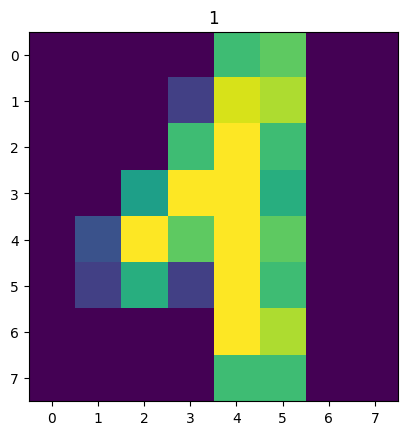

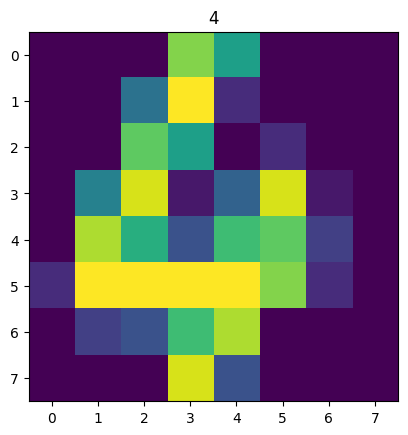

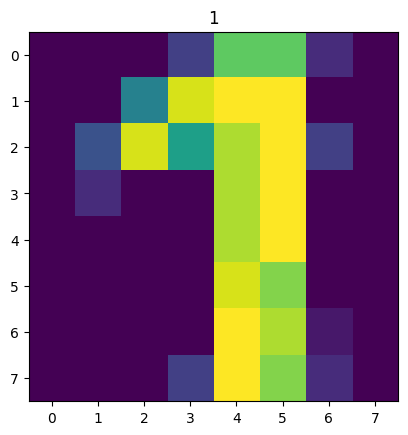

In [30]:
# Plot some of the digits
for idx in [200 , 800 , 1500 ]:
    plt.figure () #plt.figure() in Matplotlib creates a new, empty figure (canvas) where you can draw plots.
                  #To start a fresh plot, especially if you're drawing multiple plots.
    plt.imshow ( images [idx ,:])
    plt.title ( target [ idx ])
    plt.show()

<h1>Training using KNN</h1>

In [31]:
# Project the data into two dimensions using PCA .
pca = PCA(n_components =2)
compressed = pca.fit_transform(data)
print(compressed)

[[ -1.25946645 -21.27488348]
 [  7.9576113   20.76869896]
 [  6.99192297   9.95598641]
 ...
 [ 10.8012837    6.96025223]
 [ -4.87210009 -12.42395362]
 [ -0.34438963  -6.36554919]]


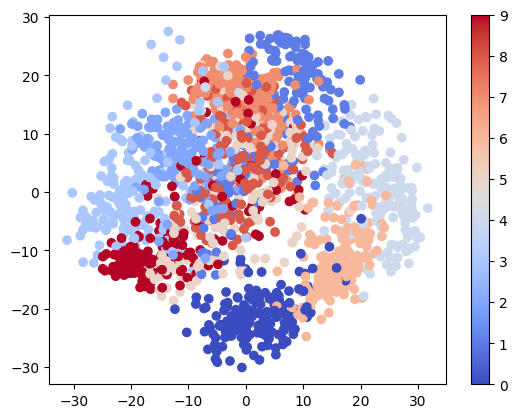

In [66]:
plt.figure()
plt.scatter(compressed[:,0],compressed[:,1],c=target,cmap='coolwarm')
plt.colorbar()
plt.show()

In [33]:
xtrain , xtest , ttrain , ttest = train_test_split(compressed,target)

In [40]:
kNN = KNeighborsClassifier(n_neighbors =20)
kNN.fit(xtrain, ttrain)

KNeighborsClassifier(n_neighbors=20)

In [41]:
print(kNN.score(xtrain,ttrain))

0.6778025241276912


In [42]:
print(kNN.score(xtest,ttest))

0.6688888888888889


<h2>Accuracy graph for train data</h2>

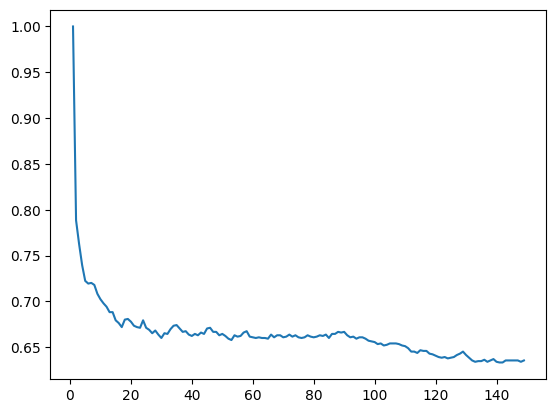

In [46]:
accuracy = []
k = []
for i in range(1,150):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(xtrain, ttrain)
    accuracy.append(kNN.score (xtrain ,ttrain))
    k.append(i)
plt.plot(k,accuracy)
plt.show()

<h2>Accuracy graph for test data</h2>

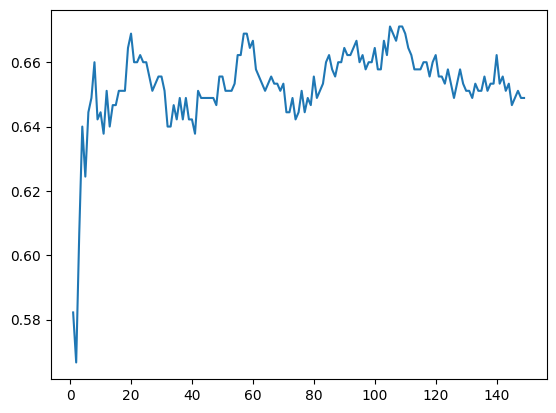

In [47]:
accuracy = []
k = []
for i in range(1,150):
    kNN = KNeighborsClassifier(n_neighbors = i)
    kNN.fit(xtrain, ttrain)
    accuracy.append(kNN.score (xtest ,ttest))
    k.append(i)
plt.plot(k,accuracy)
plt.show()

<h1>Training using decision trees</h1>

In [51]:
from sklearn . tree import DecisionTreeClassifier

dT = DecisionTreeClassifier(random_state=0, max_depth=20)
dT.fit(xtrain,ttrain)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [52]:
print(dT.score(xtrain,ttrain))

0.9925760950259837


In [53]:
print(dT.score(xtest,ttest))

0.5711111111111111


<h2>Accuracy graph for test data</h2>

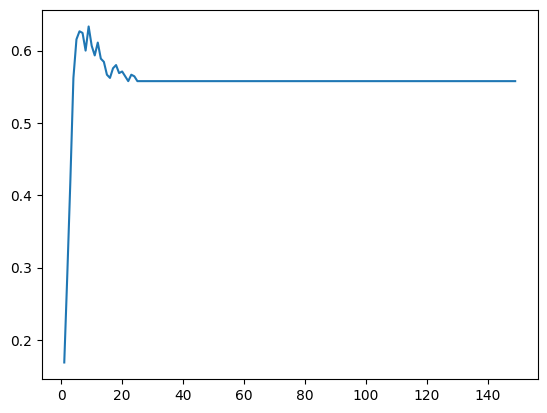

In [54]:
accuracy = []
depth = []
for i in range(1,150):
    dT = DecisionTreeClassifier(random_state=0, max_depth=i)
    dT.fit(xtrain, ttrain)
    accuracy.append(dT.score (xtest ,ttest))
    depth.append(i)
plt.plot(depth,accuracy)
plt.show()

<h2>Accuracy graph for train data</h2>

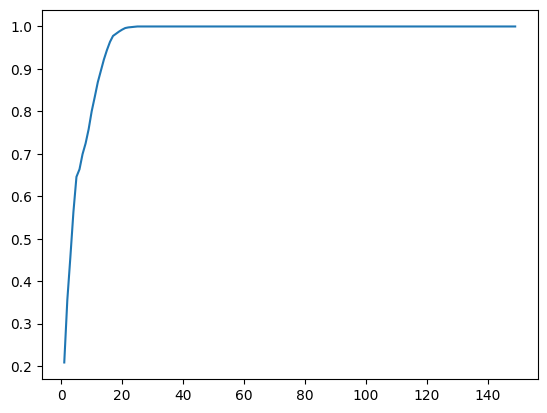

In [55]:
accuracy = []
depth = []
for i in range(1,150):
    dT = DecisionTreeClassifier(random_state=0, max_depth=i)
    dT.fit(xtrain, ttrain)
    accuracy.append(dT.score (xtrain ,ttrain))
    depth.append(i)
plt.plot(depth,accuracy)
plt.show()

<h1>Training using SVM</h1>

In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [59]:
# Train the classifier and run the test data through it.
classifier = SVC(gamma="auto")
classifier . fit (xtrain , ttrain)
ytrain = classifier . predict (xtrain)
ytest = classifier . predict (xtest)

In [68]:
# Compute and print the model accuracy .
trainAccuracy = accuracy_score ( ttrain , ytrain )
testAccuracy = accuracy_score ( ttest , ytest )
print (f"{ trainAccuracy} training accuracy , { testAccuracy } testing accruacy ")

0.7906458797327395 training accuracy , 0.6355555555555555 testing accruacy 
